# Final Data Analysis

# Imports and Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [2]:
df_relevant = pd.read_excel('results/final/final_results.xlsx', sheet_name='relevant_papers')
df_all_papers = pd.read_csv('results/ICSE_all_papers.csv')

print("Relevant Shape:", df_relevant.shape)
print("All Papers Shape:", df_all_papers.shape)

Relevant Shape: (177, 28)
All Papers Shape: (692, 11)


## Creating Combined and Non-Relevant Dataframes

In [3]:
# Relevant Paper List
relevant_papers = df_relevant['title'].tolist()

# Remove relevant papers from all papers to create final non-relevant set
df_non_relevant = df_all_papers[~df_all_papers['title'].isin(relevant_papers)].copy()

# Make sure all non-relevant papers are marked as such
df_non_relevant['relevant'] = False

# Re-order columns to match relevant dataframe
common_columns = ['reviewer', 'relevant', 'year', 'title', 'authors', 'url', 'abstract', 'artifact_available', 'artifact_reusable', 'artifact_functional', 'ai']
df_non_relevant = df_non_relevant[common_columns]

# Add extra columns: 'task', 'non_llm_approaches', 'models_open_closed', 'num_models', 'model_families', 'model_scale', 'model_size_free_text', 'model_sizes_reported', 'model_config', 'dataset_type', 'programming_language', 'cost', 'cost_free_text', 'artefact_manual', 'contamination', 'contamination_free_text'
extra_columns = ['task', 'non_llm_approaches', 'models_open_closed', 'num_models', 'model_families', 'model_scale', 'model_size_free_text', 'model_sizes_reported', 'model_config', 'dataset_type', 'programming_language', 'cost', 'cost_free_text', 'artefact_manual', 'contamination', 'contamination_free_text']
for col in extra_columns:
    df_non_relevant[col] = None

# Combine relevant and non-relevant dataframes
df_combined = pd.concat([df_relevant, df_non_relevant], ignore_index=True)

## Sanity Checks

In [4]:
print("Combined Shape:", df_combined.shape)
print("Num Unique Papers:", df_combined['title'].nunique())
print("Num Relevant Papers in Combined DF:", df_combined[df_combined['relevant'] == True].shape[0])
print("Num Unique Papers in Relevant DF:", df_relevant['title'].nunique()) # Should match number above

Combined Shape: (692, 28)
Num Unique Papers: 692
Num Relevant Papers in Combined DF: 177
Num Unique Papers in Relevant DF: 177


# Analysis

We now have access to four dataframes for analysis:

- `df_combined`: contains all papers and final columns from our spreadsheet (non-relevant papers just have None values in the fields we completed for the relevant papers)
- `df_relevant`: contains all relevant papers as rows and the final columns we intend to use for analysis
- `df_non_relevant`: contains all non-relevant papers. Our finals columns are present but all filled with None values as we didn't perform data extraction for these papers.
- `df_aff`: contains one row per author per paper as well as their affiliation and country to which that institution belongs.

# Initial Analysis

## Number of Papers at Each Stage

In [5]:
# Total numbers
print("Total Papers in Combined DF:", df_combined.shape[0])

print("\nTotal Papers from AI Keywords:")
print(df_combined['ai'].value_counts())

print("\nTotal Relevant Papers:")
print(df_combined['relevant'].value_counts())

Total Papers in Combined DF: 692

Total Papers from AI Keywords:
ai
False    388
True     304
Name: count, dtype: int64

Total Relevant Papers:
relevant
False    515
True     177
Name: count, dtype: int64


In [6]:
# Per Year
print("Papers Per Year:")
print(df_combined.groupby('year')['title'].nunique())

print("\nAI Papers Per Year:")
print(df_combined[df_combined['ai'] == True].groupby('year')['title'].nunique())

print("\nRelevant Papers Per Year:")
print(df_combined[df_combined['relevant'] == True].groupby('year')['title'].nunique())

Papers Per Year:
year
2023    210
2024    236
2025    246
Name: title, dtype: int64

AI Papers Per Year:
year
2023     59
2024     99
2025    146
Name: title, dtype: int64

Relevant Papers Per Year:
year
2023    32
2024    55
2025    90
Name: title, dtype: int64


## Numbers of Relevant Papers (Papers with LLM-based Empirical Studies)

In [7]:
print("Overall Relevant vs Non-Relevant Counts:")
print(df_combined["relevant"].value_counts())

print("\n\nRelevant Papers by Year:")
print(df_relevant["year"].value_counts())

Overall Relevant vs Non-Relevant Counts:
relevant
False    515
True     177
Name: count, dtype: int64


Relevant Papers by Year:
year
2025    90
2024    55
2023    32
Name: count, dtype: int64


# RQ1 - What Tasks are being tackled in LLM SE studies, and are they fairly evaluated against existing non-LLM techniques?

DF Columns to use:
- 'task' (short-text)
- 'non_llm_approaches' (bool)
- 'dataset_type' (short-text)
- programming_language (short-text)

## Tasks Tackled

In [8]:
df_relevant['task_list'] = df_relevant['task'].apply(
    lambda x: [task.strip() for task in str(x).split(';')] if pd.notna(x) else []
)

print(df_relevant['task_list'].explode().value_counts())

task_list
code generation                                   26
program repair                                    24
test generation                                   23
vulnerability detection                           16
bug detection                                     12
code translation                                   8
clone detection                                    6
code completion                                    6
code summarisation                                 6
code comprehension                                 5
type detection                                     5
log parsing                                        5
code search                                        5
fuzzing                                            4
bug reproduction                                   3
commit message generation                          3
fault localisation                                 3
code memorisation detection                        3
test repair                         

In [9]:
print("Unique Tasks:")

for task in sorted(df_relevant['task_list'].explode().unique()):
    print(f"    \"{task}\":\"\",")

print("Num Unique Tasks:", df_relevant['task_list'].explode().nunique())

Unique Tasks:
    "AI generated code detection":"",
    "API misuse detection":"",
    "CI/CD workflow generation":"",
    "GUI test case migration":"",
    "SO post editing":"",
    "SO posts summarisation":"",
    "UI design repair":"",
    "algorithm classification":"",
    "assert generation":"",
    "binary software composition analysis":"",
    "bug detection":"",
    "bug report comprehension":"",
    "bug reproduction":"",
    "clone detection":"",
    "code adaptation":"",
    "code completion":"",
    "code comprehension":"",
    "code generation":"",
    "code idioms detection":"",
    "code memorisation detection":"",
    "code optimisation":"",
    "code refinement":"",
    "code retrieval":"",
    "code review":"",
    "code search":"",
    "code summarisation":"",
    "code translation":"",
    "comment generation":"",
    "comment repair":"",
    "commit message generation":"",
    "configuration validation":"",
    "detection of code design issues":"",
    "emotion-cau

In [10]:
task_to_topic = {
    "AI generated code detection":"emerging",
    "API misuse detection":"issue_detection_localisation",
    "CI/CD workflow generation":"miscellaneous",
    "GUI test case migration":"verification_validation",
    "SO post editing":"miscellaneous",
    "SO posts summarisation":"miscellaneous",
    "UI design repair":"automated_repair",
    "algorithm classification":"miscellaneous",
    "assert generation":"verification_validation",
    "binary software composition analysis":"program_comprehension",
    "bug detection":"issue_detection_localisation",
    "bug report comprehension":"program_comprehension",
    "bug reproduction":"verification_validation",
    "clone detection":"program_comprehension",
    "code adaptation":"code_recommendation",
    "code completion":"code_recommendation",
    "code comprehension":"program_comprehension",
    "code generation":"code_recommendation",
    "code idioms detection":"program_comprehension",
    "code memorisation detection":"emerging",
    "code optimisation":"code_recommendation",
    "code refinement":"code_recommendation",
    "code retrieval":"program_comprehension",
    "code review":"verification_validation",
    "code search":"code_recommendation",
    "code summarisation":"program_comprehension",
    "code translation":"code_recommendation",
    "comment generation":"program_comprehension",
    "comment repair":"automated_repair",
    "commit message generation":"program_comprehension",
    "configuration validation":"verification_validation",
    "detection of code design issues":"issue_detection_localisation",
    "emotion-cause extraction":"miscellaneous",
    "exception handling recommender":"code_recommendation",
    "fault localisation":"issue_detection_localisation",
    "figurative language detection":"miscellaneous",
    "formal verification":"verification_validation",
    "fuzzing":"verification_validation",
    "heterogeneous device mapping":"miscellaneous",
    "inconsistency prediction in decentralised apps":"smart_contracts",
    "log generation":"log_analysis",
    "log parsing":"log_analysis",
    "log understanding":"log_analysis",
    "machine-generated code detection":"emerging",
    "software model evolution":"miscellaneous",
    "model extraction":"emerging",
    "mutant generation":"verification_validation",
    "optimal thread coarsening factor":"miscellaneous",
    "patch correctness assessment":"automated_repair",
    "privacy inconsistencies detection":"security_privacy",
    "program analysis":"program_comprehension",
    "program comprehension":"program_comprehension",
    "program repair":"automated_repair",
    "question answering":"miscellaneous",
    "regression testing":"verification_validation",
    "requirements analysis":"requirements_engineering",
    "root cause analysis":"verification_validation",
    "security injection":"security_privacy",
    "security patch detection":"security_privacy",
    "smart contract auditing":"smart_contracts",
    "software effort estimation":"miscellaneous",
    "static analysis":"verification_validation",
    "test generation":"verification_validation",
    "test repair":"automated_repair",
    "traceability link recovery":"program_comprehension",
    "type detection":"program_comprehension",
    "vulnerability alert prediction":"security_privacy",
    "vulnerability detection":"security_privacy",
    "vulnerability repair":"automated_repair",
}

# Map tasks to new topic column
df_relevant['topic_list'] = df_relevant['task_list'].apply(
    lambda tasks: list({task_to_topic.get(task, "other") for task in tasks})
)

print("\nRelevant Papers by Topic:")
print(df_relevant['topic_list'].explode().value_counts())


Relevant Papers by Topic:
topic_list
code_recommendation             43
verification_validation         39
program_comprehension           31
automated_repair                30
security_privacy                20
issue_detection_localisation    16
miscellaneous                    9
log_analysis                     7
emerging                         6
smart_contracts                  2
requirements_engineering         1
Name: count, dtype: int64


In [11]:
# print each paper per task
for task in df_relevant['task_list'].explode().unique():
    if pd.isna(task):
        continue
    print(f"\n{task}")
    papers_for_task = df_relevant[df_relevant['task_list'].apply(lambda tasks: task in tasks)]
    for _, row in papers_for_task.iterrows():
        print(f"- {row['title']} ({row['year']})")


vulnerability detection
- Show Me Your Code! Kill Code Poisoning: A Lightweight Method Based on Code Naturalness (2025)
- GVI: Guided Vulnerability Imagination for Boosting Deep Vulnerability Detectors (2025)
- Leveraging Large Language Models to Detect npm Malicious Packages (2025)
- Similar but Patched Code Considered Harmful: The Impact of Similar but Patched Code on Recurring Vulnerability Detection and How to Remove Them (2025)
- Vulnerability Detection with Code Language Models: How Far Are We? (2025)
- Metamorphic-Based Many-Objective Distillation of LLMs for Code-Related Tasks (2025)
- VGX: Large-Scale Sample Generation for Boosting Learning-Based Software Vulnerability Analyses (2024)
- Where is it? Tracing the Vulnerability-relevant Files from Vulnerability Reports (2024)
- Pre-training by Predicting Program Dependencies for Vulnerability Analysis Tasks (2024)
- GPTScan: Detecting Logic Vulnerabilities in Smart Contracts by Combining GPT with Program Analysis (2024)
- TRACED

In [12]:
# Looking at how many papers cover multiple tasks
df_relevant['num_tasks'] = df_relevant['task_list'].apply(len)

print("Distribution of number of tasks per paper:")
print(df_relevant['num_tasks'].value_counts().sort_index())
print(f"\nPapers covering multiple tasks: {(df_relevant['num_tasks'] > 1).sum()}")
print(f"Percentage covering multiple tasks: {(df_relevant['num_tasks'] > 1).mean()*100:.1f}%")

print("")

Distribution of number of tasks per paper:
num_tasks
1     157
2      11
3       5
4       3
13      1
Name: count, dtype: int64

Papers covering multiple tasks: 20
Percentage covering multiple tasks: 11.3%



## Comparison to Non-LLM Approaches

In [13]:
# Consolidating to just Boolean values
df_relevant['non_llm_approaches_bool'] = df_relevant['non_llm_approaches'].apply(lambda x: 'true' in str(x).strip().lower())
print(df_relevant['non_llm_approaches_bool'].value_counts())
number_non_llm_present = df_relevant['non_llm_approaches_bool'].sum()
total = df_relevant.shape[0]

print(f"Overall: Non-LLM techniques in {number_non_llm_present} out of {total} papers ({(number_non_llm_present/total)*100:.1f}%)")

non_llm_approaches_bool
True     114
False     63
Name: count, dtype: int64
Overall: Non-LLM techniques in 114 out of 177 papers (64.4%)


In [14]:
number_non_llm_present_2023 = df_relevant[df_relevant['year'] == 2023]['non_llm_approaches_bool'].sum()
total_2023 = df_relevant[df_relevant['year'] == 2023].shape[0]
print(f"2023: Non-LLM techniques in {number_non_llm_present_2023} out of {total_2023} papers ({(number_non_llm_present_2023/total_2023)*100:.1f}%)")

number_non_llm_present_2024 = df_relevant[df_relevant['year'] == 2024]['non_llm_approaches_bool'].sum()
total_2024 = df_relevant[df_relevant['year'] == 2024].shape[0]
print(f"2024: Non-LLM techniques in {number_non_llm_present_2024} out of {total_2024} papers ({(number_non_llm_present_2024/total_2024)*100:.1f}%)")

number_non_llm_present_2025 = df_relevant[df_relevant['year'] == 2025]['non_llm_approaches_bool'].sum()
total_2025 = df_relevant[df_relevant['year'] == 2025].shape[0]
print(f"2025: Non-LLM techniques in {number_non_llm_present_2025} out of {total_2025} papers ({(number_non_llm_present_2025/total_2025)*100:.1f}%)")

2023: Non-LLM techniques in 27 out of 32 papers (84.4%)
2024: Non-LLM techniques in 36 out of 55 papers (65.5%)
2025: Non-LLM techniques in 51 out of 90 papers (56.7%)


In [15]:
df_relevant[df_relevant['task_list'].apply(lambda x: 'code memorisation detection' in x)]

,reviewer,relevant,year,title,authors,url,abstract,artifact_available,artifact_reusable,artifact_functional,ai,task,non_llm_approaches,models_open_closed,num_models,model_families,model_scale,model_size_free_text,model_sizes_reported,model_config,dataset_type,programming_language,cost,cost_free_text,artefact_manual,contamination,contamination_free_text,topic,task_list,topic_list,num_tasks,non_llm_approaches_bool
171,DW,True,2025,Decoding Secret Memorization in Code LLMs Thro...,"Nie, Yuqing, Wang, Chong, Wang, Kailong, Xu, G...",https://doi.org/10.1109/ICSE55347.2025.00229,Code Large Language Models (LLMs) have demonst...,False,False,False,True,code memorisation detection,False,open,5,StableCode; CodeGen; DeepSeekCoder; CodeLlama;...,MEDIUM,"StableCode-3B,3B;CodeGen2.5-7B-multi,7B;DeepSe...",full,inference,code,HTML; Java; JavaScript; Python,gpu,All the experiments are conducted on a server ...,True,True,Training Data Decontamination. Data cleaning s...,NaN,[code memorisation detection],[emerging],1,False
172,DW,True,2024,Traces of Memorisation in Large Language Model...,"Al-Kaswan, Ali, Izadi, Maliheh, van Deursen, Arie",https://doi.org/10.1145/3597503.3639133,Large language models have gained significant ...,False,False,False,True,code memorisation detection,False,open,37,GPT-NEO;GPT-2;Pythia;CodeGen-NL;CodeGen-Mono;C...,SMALL/MEDIUM,"GPT-NEO-125M,GPT-NEO-1.3B,GPT-NEO-2.7B,GPT-2-1...",full,inference,"code, text",Python,gpu,we allocated 8 CPU cores with 32GB of RAM and ...,True,True,The paper is about contamination/memorisation,NaN,[code memorisation detection],[emerging],1,False
173,MK,True,2024,Unveiling Memorization in Code Models,"Yang, Zhou, Zhao, Zhipeng, Wang, Chenyu, Shi, ...",https://doi.org/10.1145/3597503.3639074,"The availability of large-scale datasets, adva...",False,False,False,True,code memorisation detection,False,open,6,CodeParrot; PolyCoder; GPT-NEO; InCoder; StarC...,SMALL/MEDIUM,CodeParrot is a GPT-2 model with 1.5 billion p...,some,inference,"code, documentation (text), configuration (tex...",Python,time;gpu,... we run them an NVIDIA GeForce\nA5000 GPU w...,True,True,"To mitigate this threat, we choose a state-of-...",NaN,[code memorisation detection],[emerging],1,False


## Programming Languages Used

In [16]:
df_relevant["programming_languages_list"] = df_relevant['programming_language'].apply(
    lambda x: [lang.strip() for lang in str(x).split(';')] if pd.notna(x) else []
)

print("Overall Programming Language Stats:")
df_relevant["programming_languages_list"].explode().value_counts()

Overall Programming Language Stats:


programming_languages_list
Java           67
Python         56
C              30
C++            23
JavaScript     13
PHP            10
Go              9
NM              8
Rust            7
Ruby            7
C#              5
Kotlin          3
SQL             3
R               2
TypeScript      2
Haskell         2
Objective-C     2
Scala           2
Swift           2
Prolog          1
Erlang          1
Solidity        1
Bash            1
CSharp          1
Perl            1
SCRATCH         1
HTML            1
Name: count, dtype: int64

### Top 5 Programming Languages Per Year

In [17]:
print("2023 Programming Language Stats:")
df_relevant[df_relevant['year'] == 2023]["programming_languages_list"].explode().value_counts().head(5)

2023 Programming Language Stats:


programming_languages_list
Java          14
Python         9
C              7
JavaScript     4
PHP            4
Name: count, dtype: int64

In [18]:
print("2024 Programming Language Stats:")
df_relevant[df_relevant['year'] == 2024]["programming_languages_list"].explode().value_counts().head(5)

2024 Programming Language Stats:


programming_languages_list
Java      22
Python    18
C         11
C++        9
Go         4
Name: count, dtype: int64

In [19]:
print("2025 Programming Language Stats:")
df_relevant[df_relevant['year'] == 2025]["programming_languages_list"].explode().value_counts().head(5)

2025 Programming Language Stats:


programming_languages_list
Java          31
Python        29
C             12
C++           12
JavaScript     6
Name: count, dtype: int64

### Papers that Evaluate with Multiple Programming Languages

In [20]:
def programming_language_distribution_and_multi_language_stats(df):
    print("Distribution of number of programming languages per paper:")
    print(df["programming_languages_list"].apply(len).value_counts())
    print(f"\nPapers covering multiple programming languages: {(df['programming_languages_list'].apply(len) > 1).sum()}")
    print(f"Percentage covering multiple programming languages: {(df['programming_languages_list'].apply(len) > 1).mean()*100:.1f}%")

print("Overall Programming Language Stats:")
programming_language_distribution_and_multi_language_stats(df_relevant)

Overall Programming Language Stats:
Distribution of number of programming languages per paper:
programming_languages_list
1     81
0     48
2     24
3     10
6      4
4      3
10     2
5      2
16     1
7      1
13     1
Name: count, dtype: int64

Papers covering multiple programming languages: 48
Percentage covering multiple programming languages: 27.1%


In [21]:
print("\n2023 Programming Language Stats:")
programming_language_distribution_and_multi_language_stats(df_relevant[df_relevant['year'] == 2023])


2023 Programming Language Stats:
Distribution of number of programming languages per paper:
programming_languages_list
1    13
0     9
2     5
4     1
6     1
7     1
5     1
3     1
Name: count, dtype: int64

Papers covering multiple programming languages: 10
Percentage covering multiple programming languages: 31.2%


In [22]:
print("\n2024 Programming Language Stats:")
programming_language_distribution_and_multi_language_stats(df_relevant[df_relevant['year'] == 2024])


2024 Programming Language Stats:
Distribution of number of programming languages per paper:
programming_languages_list
1     22
0     15
2     10
3      3
5      1
6      1
4      1
16     1
13     1
Name: count, dtype: int64

Papers covering multiple programming languages: 18
Percentage covering multiple programming languages: 32.7%


In [23]:
print("\n2025 Programming Language Stats:")
programming_language_distribution_and_multi_language_stats(df_relevant[df_relevant['year'] == 2025])


2025 Programming Language Stats:
Distribution of number of programming languages per paper:
programming_languages_list
1     46
0     24
2      9
3      6
6      2
10     2
4      1
Name: count, dtype: int64

Papers covering multiple programming languages: 20
Percentage covering multiple programming languages: 22.2%


# RQ2 - What models are being used?

DF Columns to use:
- 'models_open_closed' (open/closed/both)
- 'num_models' (int)
- 'model_families' (list of short text)
- 'model_sizes_reported' (NA/none/some/full - currently unfinished)
- 'model_scale' (currently unfinished)

### Open vs. Closed

In [24]:
df_relevant['models_open_closed'].value_counts()

models_open_closed
open      71
both      65
closed    41
Name: count, dtype: int64

In [25]:
total = df_relevant.shape[0]
number_open = df_relevant[~(df_relevant['models_open_closed'] == 'closed')].shape[0]
number_closed = df_relevant[~(df_relevant['models_open_closed'] == 'open')].shape[0]

print(f"Open models in {number_open} out of {total} papers ({(number_open/total)*100:.1f}%)")
print(f"Closed models in {number_closed} out of {total} papers ({(number_closed/total)*100:.1f}%)")

Open models in 136 out of 177 papers (76.8%)
Closed models in 106 out of 177 papers (59.9%)


In [26]:
total_2023 = df_relevant[df_relevant["year"] == 2023].shape[0]
number_open_2023 = df_relevant[(df_relevant["year"] == 2023) & ~(df_relevant['models_open_closed'] == 'closed')].shape[0]
number_open_only_2023 = df_relevant[(df_relevant["year"] == 2023) & (df_relevant['models_open_closed'] == 'open')].shape[0]
number_closed_2023 = df_relevant[(df_relevant["year"] == 2023) & ~(df_relevant['models_open_closed'] == 'open')].shape[0]
number_closed_only_2023 = df_relevant[(df_relevant["year"] == 2023) & (df_relevant['models_open_closed'] == 'closed')].shape[0]
number_both_2023 = df_relevant[(df_relevant["year"] == 2023) & (df_relevant['models_open_closed'] == 'both')].shape[0]

print(f"2023 Papers:")
print(f"Only open models in {number_open_only_2023} out of {total_2023} papers ({(number_open_only_2023/total_2023)*100:.1f}%)")
print(f"Only closed models in {number_closed_only_2023} out of {total_2023} papers ({(number_closed_only_2023/total_2023)*100:.1f}%)")
print(f"Open models in {number_open_2023} out of {total_2023} papers ({(number_open_2023/total_2023)*100:.1f}%)")
print(f"Closed models in {number_closed_2023} out of {total_2023} papers ({(number_closed_2023/total_2023)*100:.1f}%)")
print(f"Both model types in {number_both_2023} out of {total_2023} papers ({(number_both_2023/total_2023)*100:.1f}%)")

total_2024 = df_relevant[df_relevant["year"] == 2024].shape[0]
number_open_2024 = df_relevant[(df_relevant["year"] == 2024) & ~(df_relevant['models_open_closed'] == 'closed')].shape[0]
number_open_only_2024 = df_relevant[(df_relevant["year"] == 2024) & (df_relevant['models_open_closed'] == 'open')].shape[0]
number_closed_2024 = df_relevant[(df_relevant["year"] == 2024) & ~(df_relevant['models_open_closed'] == 'open')].shape[0]
number_closed_only_2024 = df_relevant[(df_relevant["year"] == 2024) & (df_relevant['models_open_closed'] == 'closed')].shape[0]
number_both_2024 = df_relevant[(df_relevant["year"] == 2024) & (df_relevant['models_open_closed'] == 'both')].shape[0]

print(f"\n2024 Papers:")
print(f"Only open models in {number_open_only_2024} out of {total_2024} papers ({(number_open_only_2024/total_2024)*100:.1f}%)")
print(f"Only closed models in {number_closed_only_2024} out of {total_2024} papers ({(number_closed_only_2024/total_2024)*100:.1f}%)")
print(f"Open models in {number_open_2024} out of {total_2024} papers ({(number_open_2024/total_2024)*100:.1f}%)")
print(f"Closed models in {number_closed_2024} out of {total_2024} papers ({(number_closed_2024/total_2024)*100:.1f}%)")
print(f"Both model types in {number_both_2024} out of {total_2024} papers ({(number_both_2024/total_2024)*100:.1f}%)")

total_2025 = df_relevant[df_relevant["year"] == 2025].shape[0]
number_open_2025 = df_relevant[(df_relevant["year"] == 2025) & ~(df_relevant['models_open_closed'] == 'closed')].shape[0]
number_open_only_2025 = df_relevant[(df_relevant["year"] == 2025) & (df_relevant['models_open_closed'] == 'open')].shape[0]
number_closed_2025 = df_relevant[(df_relevant["year"] == 2025) & ~(df_relevant['models_open_closed'] == 'open')].shape[0]
number_closed_only_2025 = df_relevant[(df_relevant["year"] == 2025) & (df_relevant['models_open_closed'] == 'closed')].shape[0]
number_both_2025 = df_relevant[(df_relevant["year"] == 2025) & (df_relevant['models_open_closed'] == 'both')].shape[0]

print(f"\n2025 Papers:")
print(f"Only open models in {number_open_only_2025} out of {total_2025} papers ({(number_open_only_2025/total_2025)*100:.1f}%)")
print(f"Only closed models in {number_closed_only_2025} out of {total_2025} papers ({(number_closed_only_2025/total_2025)*100:.1f}%)")
print(f"Open models in {number_open_2025} out of {total_2025} papers ({(number_open_2025/total_2025)*100:.1f}%)")
print(f"Closed models in {number_closed_2025} out of {total_2025} papers ({(number_closed_2025/total_2025)*100:.1f}%)")
print(f"Both model types in {number_both_2025} out of {total_2025} papers ({(number_both_2025/total_2025)*100:.1f}%)")

print("Concerning Trend: Increasing use of closed models over time! Particularly papers that feature only closed/commercial models.")

2023 Papers:
Only open models in 22 out of 32 papers (68.8%)
Only closed models in 4 out of 32 papers (12.5%)
Open models in 28 out of 32 papers (87.5%)
Closed models in 10 out of 32 papers (31.2%)
Both model types in 6 out of 32 papers (18.8%)

2024 Papers:
Only open models in 25 out of 55 papers (45.5%)
Only closed models in 13 out of 55 papers (23.6%)
Open models in 42 out of 55 papers (76.4%)
Closed models in 30 out of 55 papers (54.5%)
Both model types in 17 out of 55 papers (30.9%)

2025 Papers:
Only open models in 24 out of 90 papers (26.7%)
Only closed models in 24 out of 90 papers (26.7%)
Open models in 66 out of 90 papers (73.3%)
Closed models in 66 out of 90 papers (73.3%)
Both model types in 42 out of 90 papers (46.7%)
Concerning Trend: Increasing use of closed models over time! Particularly papers that feature only closed/commercial models.


## Number of Models

In [27]:
print("Number of papers with X models:")
df_relevant['num_models'].value_counts()

Number of papers with X models:


num_models
1     48
3     24
2     23
5     17
4     17
6     13
7      9
8      7
9      5
10     4
11     3
16     2
19     2
15     1
12     1
37     1
Name: count, dtype: int64

In [28]:
df_relevant['model_families_list'] = df_relevant['model_families'].apply(
    lambda x: [model_family.strip() for model_family in str(x).split(';')] if pd.notna(x) else []
)

print("Overall Paper counts per model family:")
print(df_relevant['model_families_list'].explode().value_counts())

Overall Paper counts per model family:
model_families_list
GPT-4                           47
GPT-3.5                         44
CodeBERT                        34
CodeLlama                       26
CodeT5                          22
CodeGen                         19
StarCoder                       18
GraphCodeBERT                   18
Llama                           17
RoBERTa                         15
ChatGPT                         14
BERT                            13
DeepSeekCoder                   12
UniXcoder                       11
Codex                           10
InCoder                          9
T5                               8
Claude                           7
Gemini                           7
ChatGLM                          6
DeepSeek                         6
CodeQwen                         6
GPT-3                            6
UnixCoder                        6
PLBART                           6
CodeGPT                          5
CodeParrot                     

In [29]:
df_relevant[df_relevant['year'] == 2023]['model_families_list'].explode().value_counts()

model_families_list
CodeBERT            11
RoBERTa              8
BERT                 7
CodeT5               7
Codex                5
T5                   5
GraphCodeBERT        4
DistilBERT           3
PLBART               2
GPT-J                2
CodeGen              2
BART                 2
InCoder              2
GPT-Neo              2
XLNet                1
MiniLM               1
ELECTRA              1
ALBERT               1
RepresentThemAll     1
seBERT               1
Code-davinci         1
Curie                1
Davinci              1
T5-learning          1
CodeGPT              1
JavaBERT             1
DOBF                 1
CuBERT               1
ProphetNet-Code      1
SPT-Code             1
CoTexT               1
C-BERT               1
GPT-C                1
CugLM                1
TreeBERT             1
GPT-2                1
SynCoBERT            1
DeepDebug            1
UniXcoder            1
GPT-NeoX             1
PLBart               1
GPT-3                1
CodeParrot    

In [30]:
df_relevant[df_relevant['year'] == 2024]['model_families_list'].explode().value_counts()

model_families_list
CodeBERT           11
GPT-3.5             9
GPT-4               8
CodeT5              8
ChatGPT             8
CodeGen             8
GraphCodeBERT       7
UniXcoder           5
BERT                5
Codex               4
RoBERTa             4
InCoder             4
StarCoder           4
Llama               3
ChatGLM             3
UnixCoder           3
PLBART              3
T5                  3
GPT-3               3
GPT-2               3
text-davinci        3
PolyCoder           3
CodeGeeX            2
CodeParrot          2
UniLog              2
GPT-NEO             2
Copilot             2
Vicuna              2
Pythia              2
CodeGPT             2
Airboros            1
code-davinci        1
SantaCoder          1
WizardCoder         1
Sentence-BERT       1
GPTBigCode          1
seBERT              1
VulBERTa            1
PDBERT              1
ALBERT              1
KeyBERT             1
LSTM                1
TFix                1
DISCO               1
text-embeddi

In [31]:
df_relevant[df_relevant['year'] == 2025]['model_families_list'].explode().value_counts()

model_families_list
GPT-4                           39
GPT-3.5                         35
CodeLlama                       25
Llama                           14
StarCoder                       14
CodeBERT                        12
DeepSeekCoder                   12
CodeGen                          9
Claude                           7
Gemini                           7
CodeT5                           7
GraphCodeBERT                    7
ChatGPT                          6
CodeQwen                         6
DeepSeek                         6
UniXcoder                        5
UnixCoder                        3
LineVul                          3
WizardCoder                      3
ChatGLM                          3
Mistral                          3
Gemma                            3
RoBERTa                          3
InCoder                          3
Codestral                        2
Qwen                             2
CodeT5+                          2
CodeGemma                        2


# RQ3 - How well do authors tackle the problem of data leakage/contamination?

DF Columns to use:
- contamination (bool)
- contamination_free_text (free text)

In [32]:
# Overall
total = df_relevant.shape[0]
contamination_reported = df_relevant['contamination'].sum()

print(f"All years: Contamination reported in {contamination_reported} out of {total} papers ({(contamination_reported/total)*100:.1f}%)")

All years: Contamination reported in 58 out of 177 papers (32.8%)


In [33]:
# Per Year
total_2023 = df_relevant[df_relevant['year'] == 2023].shape[0]
contamination_2023 = df_relevant[df_relevant['year'] == 2023]['contamination'].sum()
print(f"2023: Contamination reported in {contamination_2023} out of {total_2023} papers ({(contamination_2023/total_2023)*100:.1f}%)")

total_2024 = df_relevant[df_relevant['year'] == 2024].shape[0]
contamination_2024 = df_relevant[df_relevant['year'] == 2024]['contamination'].sum()
print(f"2024: Contamination reported in {contamination_2024} out of {total_2024} papers ({(contamination_2024/total_2024)*100:.1f}%)")

total_2025 = df_relevant[df_relevant['year'] == 2025].shape[0]
contamination_2025 = df_relevant[df_relevant['year'] == 2025]['contamination'].sum()
print(f"2025: Contamination reported in {contamination_2025} out of {total_2025} papers ({(contamination_2025/total_2025)*100:.1f}%)")

2023: Contamination reported in 6 out of 32 papers (18.8%)
2024: Contamination reported in 14 out of 55 papers (25.5%)
2025: Contamination reported in 38 out of 90 papers (42.2%)


# RQ4 - How replicable are LLM-based studies?

DF Columns to use:
- 'model_config' (short-text list)
- 'artifact_available' (bool)
- 'artifact_reusable' (bool)
- 'artifact_functional' (bool)
- 'artefact_manual' (bool)

## ACM Badge Artifact Availability - Relevant vs. Non-Relevant

In [34]:
# Calculate proportions in the combined dataset
total_relevant = df_relevant.shape[0]
total_non_relevant = df_non_relevant.shape[0]

relevant_with_artifact = df_relevant['artifact_available'].sum()
non_relevant_with_artifact = df_non_relevant['artifact_available'].sum()

prop_relevant = relevant_with_artifact / total_relevant
prop_non_relevant = non_relevant_with_artifact / total_non_relevant

print(f"Proportion of relevant papers with artifact available: {prop_relevant:.2%} ({relevant_with_artifact}/{total_relevant})")
print(f"Proportion of other papers with artifact available: {prop_non_relevant:.2%} ({non_relevant_with_artifact}/{total_non_relevant})")

Proportion of relevant papers with artifact available: 18.64% (33/177)
Proportion of other papers with artifact available: 41.36% (213/515)


In [35]:
# Proportion of relevant papers with artifacts available per year
total_relevant_2023 = df_relevant[df_relevant['year'] == 2023].shape[0]
artifact_avail_2023 = df_relevant[(df_relevant['year'] == 2023) & (df_relevant['artifact_available'])].shape[0]
prop_relevant_2023 = artifact_avail_2023 / total_relevant_2023
print(f"2023 - Proportion of relevant papers with artifact available: {prop_relevant_2023:.2%} ({artifact_avail_2023}/{total_relevant_2023})")

total_relevant_2024 = df_relevant[df_relevant['year'] == 2024].shape[0]
artifact_avail_2024 = df_relevant[(df_relevant['year'] == 2024) & (df_relevant['artifact_available'])].shape[0]
prop_relevant_2024 = artifact_avail_2024 / total_relevant_2024
print(f"2024 - Proportion of relevant papers with artifact available: {prop_relevant_2024:.2%} ({artifact_avail_2024}/{total_relevant_2024})")

total_relevant_2025 = df_relevant[df_relevant['year'] == 2025].shape[0]
artifact_avail_2025 = df_relevant[(df_relevant['year'] == 2025) & (df_relevant['artifact_available'])].shape[0]
prop_relevant_2025 = artifact_avail_2025 / total_relevant_2025
print(f"2025 - Proportion of relevant papers with artifact available: {prop_relevant_2025:.2%} ({artifact_avail_2025}/{total_relevant_2025})")

2023 - Proportion of relevant papers with artifact available: 18.75% (6/32)
2024 - Proportion of relevant papers with artifact available: 16.36% (9/55)
2025 - Proportion of relevant papers with artifact available: 20.00% (18/90)


In [36]:
print("Overall Relevant Papers - Artifact Availability, Reusability, and Functionality Counts:")
print(df_relevant['artifact_available'].value_counts())
print(df_relevant['artifact_reusable'].value_counts())
print(df_relevant['artifact_functional'].value_counts())

Overall Relevant Papers - Artifact Availability, Reusability, and Functionality Counts:
artifact_available
False    144
True      33
Name: count, dtype: int64
artifact_reusable
False    156
True      21
Name: count, dtype: int64
artifact_functional
False    164
True      13
Name: count, dtype: int64


In [37]:
print("2023 Relevant Papers - Artifact Availability, Reusability, and Functionality Counts:")
print(df_relevant[df_relevant['year'] == 2023]['artifact_available'].value_counts())
print(df_relevant[df_relevant['year'] == 2023]['artifact_reusable'].value_counts())
print(df_relevant[df_relevant['year'] == 2023]['artifact_functional'].value_counts())

print("\n\n2024 Relevant Papers - Artifact Availability, Reusability, and Functionality Counts:")
print(df_relevant[df_relevant['year'] == 2024]['artifact_available'].value_counts())
print(df_relevant[df_relevant['year'] == 2024]['artifact_reusable'].value_counts())
print(df_relevant[df_relevant['year'] == 2024]['artifact_functional'].value_counts())

print("\n\n2025 Relevant Papers - Artifact Availability, Reusability, and Functionality Counts:")
print(df_relevant[df_relevant['year'] == 2025]['artifact_available'].value_counts())
print(df_relevant[df_relevant['year'] == 2025]['artifact_reusable'].value_counts())
print(df_relevant[df_relevant['year'] == 2025]['artifact_functional'].value_counts())

2023 Relevant Papers - Artifact Availability, Reusability, and Functionality Counts:
artifact_available
False    26
True      6
Name: count, dtype: int64
artifact_reusable
False    29
True      3
Name: count, dtype: int64
artifact_functional
False    31
True      1
Name: count, dtype: int64


2024 Relevant Papers - Artifact Availability, Reusability, and Functionality Counts:
artifact_available
False    46
True      9
Name: count, dtype: int64
artifact_reusable
False    47
True      8
Name: count, dtype: int64
artifact_functional
False    55
Name: count, dtype: int64


2025 Relevant Papers - Artifact Availability, Reusability, and Functionality Counts:
artifact_available
False    72
True     18
Name: count, dtype: int64
artifact_reusable
False    80
True     10
Name: count, dtype: int64
artifact_functional
False    78
True     12
Name: count, dtype: int64


## Manual Artefact Availability

In [38]:
print(df_relevant["artefact_manual"].value_counts())
print(f"{df_relevant[df_relevant['artefact_manual'] == 'DEAD'].shape[0]} dead links in the {df_relevant.shape[0]} relevant papers")

# Per year
print("2023 Artifacts (Manual Checking)")
print(df_relevant[df_relevant['year'] == 2023]['artefact_manual'].value_counts())
print("\n2024 Artifacts (Manual Checking)")
print(df_relevant[df_relevant['year'] == 2024]['artefact_manual'].value_counts())
print("\n2025 Artifacts (Manual Checking)")
print(df_relevant[df_relevant['year'] == 2025]['artefact_manual'].value_counts())

artefact_manual
True     144
False     24
DEAD       9
Name: count, dtype: int64
9 dead links in the 177 relevant papers
2023 Artifacts (Manual Checking)
artefact_manual
True     24
False     5
DEAD      3
Name: count, dtype: int64

2024 Artifacts (Manual Checking)
artefact_manual
True     44
False     8
DEAD      3
Name: count, dtype: int64

2025 Artifacts (Manual Checking)
artefact_manual
True     76
False    11
DEAD      3
Name: count, dtype: int64


## How many papers have manually identified artefacts but no ACM badge?

In [39]:
num_manually_identified = df_relevant[df_relevant['artefact_manual'].isin([True, 'DEAD'])].shape[0]
print(f"Number of papers with manually identified artefacts (including DEAD links): {num_manually_identified} out of {df_relevant.shape[0]} relevant papers ({(num_manually_identified/df_relevant.shape[0])*100:.1f}%)")

num_artifact_available = df_relevant[df_relevant['artifact_available']].shape[0]
print(f"Number of papers with ACM artifact available badge: {num_artifact_available} out of {df_relevant.shape[0]} relevant papers ({(num_artifact_available/df_relevant.shape[0])*100:.1f}%)")

num_manually_identified_no_badge = df_relevant[(df_relevant['artefact_manual'].isin([True, 'DEAD'])) & (~df_relevant['artifact_available'])].shape[0]
print(f"Number of papers with manually identified artefacts but no ACM artifact available badge: {num_manually_identified_no_badge} out of {df_relevant.shape[0]} relevant papers ({(num_manually_identified_no_badge/df_relevant.shape[0])*100:.1f}%)")

num_no_manual_no_badge = df_relevant[(~df_relevant['artefact_manual'].isin([True, 'DEAD'])) & (~df_relevant['artifact_available'])].shape[0]
print(f"Number of papers with no manually identified artefacts and no ACM artifact available badge: {num_no_manual_no_badge} out of {df_relevant.shape[0]} relevant papers ({(num_no_manual_no_badge/df_relevant.shape[0])*100:.1f}%)")

Number of papers with manually identified artefacts (including DEAD links): 153 out of 177 relevant papers (86.4%)
Number of papers with ACM artifact available badge: 33 out of 177 relevant papers (18.6%)
Number of papers with manually identified artefacts but no ACM artifact available badge: 124 out of 177 relevant papers (70.1%)
Number of papers with no manually identified artefacts and no ACM artifact available badge: 20 out of 177 relevant papers (11.3%)


## How many papers with ACM badges have dead links?

In [40]:
print("Number of papers with artifacts available but DEAD links:", df_relevant[(df_relevant['artefact_manual'] == 'DEAD') & (df_relevant['artifact_available'])].shape[0])
print("Number of papers with artifacts reusable but DEAD links:", df_relevant[(df_relevant['artefact_manual'] == 'DEAD') & (df_relevant['artifact_reusable'])].shape[0])
print("Number of papers with artifacts functional but DEAD links:", df_relevant[(df_relevant['artefact_manual'] == 'DEAD') & (df_relevant['artifact_functional'])].shape[0])

print("Two total papers have ACM badges with dead links. These papers both have the artifact available badge, and one of them even has the artifact reusable badge.")
df_relevant[df_relevant['artefact_manual'] == 'DEAD'][['title', 'artefact_manual', 'artifact_available', 'artifact_reusable', 'artifact_functional']]

Number of papers with artifacts available but DEAD links: 2
Number of papers with artifacts reusable but DEAD links: 1
Number of papers with artifacts functional but DEAD links: 0
Two total papers have ACM badges with dead links. These papers both have the artifact available badge, and one of them even has the artifact reusable badge.


,title,artefact_manual,artifact_available,artifact_reusable,artifact_functional
13,LLM Assistance for Memory Safety,DEAD,False,False,False
57,ChatGPT-Based Test Generation for Refactoring ...,DEAD,False,False,False
75,Automated Generation of Accessibility Test Rep...,DEAD,False,False,False
89,Make LLM a Testing Expert: Bringing Human-like...,DEAD,False,False,False
96,Demystifying and Detecting Misuses of Deep Lea...,DEAD,False,False,False
131,Large Language Models are Edge-Case Generators...,DEAD,False,False,False
134,Context-Aware Bug Reproduction for Mobile Apps,DEAD,False,False,False
140,AI-Based Question Answering Assistance for Ana...,DEAD,True,True,False
149,Large Language Models are Few-Shot Testers: Ex...,DEAD,True,False,False


## Prevalence of Reporting on Configuration

In [41]:
df_relevant["model_config"].value_counts()
df_relevant["model_config_list"] = df_relevant['model_config'].apply(
    lambda x: [config.strip() for config in str(x).split(';')] if pd.notna(x) else []
)

print("Overall Model Configuration Stats:")
df_relevant["model_config_list"].explode().value_counts()

Overall Model Configuration Stats:


model_config_list
inference     89
-             46
finetuning    43
training      24
Name: count, dtype: int64

### Reporting on Inference Parameters

In [42]:
print("Overall - Number of papers reporting on inference (generation) configuration:")
num_reporting_inference_config = df_relevant[df_relevant['model_config_list'].apply(lambda x: 'inference' in [cfg.lower() for cfg in x])].shape[0]
print(f"{num_reporting_inference_config} out of {df_relevant.shape[0]} papers ({(num_reporting_inference_config/df_relevant.shape[0])*100:.1f}%)")

Overall - Number of papers reporting on inference (generation) configuration:
89 out of 177 papers (50.3%)


In [43]:
num_reporting_inference_config_2023 = df_relevant[df_relevant['model_config_list'].apply(lambda x: 'inference' in [cfg.lower() for cfg in x]) & (df_relevant['year'] == 2023)].shape[0]
print(f"2023: Number of papers reporting on inference (generation) configuration: {num_reporting_inference_config_2023} out of {df_relevant[df_relevant['year'] == 2023].shape[0]} papers ({(num_reporting_inference_config_2023/df_relevant[df_relevant['year'] == 2023].shape[0])*100:.1f}%)")

num_reporting_inference_config_2024 = df_relevant[df_relevant['model_config_list'].apply(lambda x: 'inference' in [cfg.lower() for cfg in x]) & (df_relevant['year'] == 2024)].shape[0]
print(f"2024: Number of papers reporting on inference (generation) configuration: {num_reporting_inference_config_2024} out of {df_relevant[df_relevant['year'] == 2024].shape[0]} papers ({(num_reporting_inference_config_2024/df_relevant[df_relevant['year'] == 2024].shape[0])*100:.1f}%)")

num_reporting_inference_config_2025 = df_relevant[df_relevant['model_config_list'].apply(lambda x: 'inference' in [cfg.lower() for cfg in x]) & (df_relevant['year'] == 2025)].shape[0]
print(f"2025: Number of papers reporting on inference (generation) configuration: {num_reporting_inference_config_2025} out of {df_relevant[df_relevant['year'] == 2025].shape[0]} papers ({(num_reporting_inference_config_2025/df_relevant[df_relevant['year'] == 2025].shape[0])*100:.1f}%)")

2023: Number of papers reporting on inference (generation) configuration: 10 out of 32 papers (31.2%)
2024: Number of papers reporting on inference (generation) configuration: 27 out of 55 papers (49.1%)
2025: Number of papers reporting on inference (generation) configuration: 52 out of 90 papers (57.8%)


### Reporting on Training/Fine-Tuning Parameters

In [44]:
num_reporting_training_or_finetuning = df_relevant['model_config_list'].apply(
    lambda x: any(cfg.lower() in ['training', 'finetuning'] for cfg in x)
).sum()

print(f"Number of papers reporting training OR fine-tuning configuration: {num_reporting_training_or_finetuning} out of {df_relevant.shape[0]} papers ({(num_reporting_training_or_finetuning/df_relevant.shape[0])*100:.1f}%)")

Number of papers reporting training OR fine-tuning configuration: 61 out of 177 papers (34.5%)


In [45]:
num_reporting_training_or_finetuning_2023 = df_relevant[df_relevant['year'] == 2023]['model_config_list'].apply(
    lambda x: any(cfg.lower() in ['training', 'finetuning'] for cfg in x)
).sum()
print(f"2023: Number of papers reporting training OR fine-tuning configuration: {num_reporting_training_or_finetuning_2023} out of {df_relevant[df_relevant['year'] == 2023].shape[0]} papers ({(num_reporting_training_or_finetuning_2023/df_relevant[df_relevant['year'] == 2023].shape[0])*100:.1f}%)")

num_reporting_training_or_finetuning_2024 = df_relevant[df_relevant['year'] == 2024]['model_config_list'].apply(
    lambda x: any(cfg.lower() in ['training', 'finetuning'] for cfg in x)
).sum()
print(f"2024: Number of papers reporting training OR fine-tuning configuration: {num_reporting_training_or_finetuning_2024} out of {df_relevant[df_relevant['year'] == 2024].shape[0]} papers ({(num_reporting_training_or_finetuning_2024/df_relevant[df_relevant['year'] == 2024].shape[0])*100:.1f}%)")

num_reporting_training_or_finetuning_2025 = df_relevant[df_relevant['year'] == 2025]['model_config_list'].apply(
    lambda x: any(cfg.lower() in ['training', 'finetuning'] for cfg in x)
).sum()
print(f"2025: Number of papers reporting training OR fine-tuning configuration: {num_reporting_training_or_finetuning_2025} out of {df_relevant[df_relevant['year'] == 2025].shape[0]} papers ({(num_reporting_training_or_finetuning_2025/df_relevant[df_relevant['year'] == 2025].shape[0])*100:.1f}%)")

2023: Number of papers reporting training OR fine-tuning configuration: 20 out of 32 papers (62.5%)
2024: Number of papers reporting training OR fine-tuning configuration: 20 out of 55 papers (36.4%)
2025: Number of papers reporting training OR fine-tuning configuration: 21 out of 90 papers (23.3%)


# RQ5 - How sustainable is LLM-based SE research?

DF Columns to use:
- 'cost' (short-text list)
- 'cost_free_text' (free text)

# Geo-Analysis of LLM-Based SE Research

- split authorship by relevant and non-relevant
closed-source vs open-source geographical prevalence
- only open vs at least 1 closed-source model
- where are papers from that use over 10 models?
- where are papers from that use only closed models?

- world map for relevant vs non-relevant
  - include if the colour is massively different

In [46]:
df_aff = pd.read_csv('results/ICSE_all_affiliations_countries.csv')
all_relevant_titles = set(df_relevant['title'])
df_aff['relevant'] = df_aff['title'].apply(lambda x: x in all_relevant_titles)

print("Original df_aff shape:", df_aff.shape)

# Merge the relevant columns from df_relevant to df_aff
df_aff = df_aff.merge(
    df_relevant[['title', 'models_open_closed', 'num_models']], 
    on='title', 
    how='left'
)

# Check the result
print("Merged df_aff shape:", df_aff.shape)
print("\nColumns in merged dataframe:")
print(df_aff.columns.tolist())

# Verify the merge worked correctly
print(f"\nRows with models_open_closed data: {df_aff['models_open_closed'].notna().sum()}")
print(f"Rows with num_models data: {df_aff['num_models'].notna().sum()}")
print(f"Rows where relevant=True: {df_aff['relevant'].sum()}")

Original df_aff shape:

 (3577, 8)
Merged df_aff shape: (3577, 10)

Columns in merged dataframe:
['reviewer', 'relevant', 'title', 'original_authors', 'url', 'extracted_author', 'affiliations', 'country', 'models_open_closed', 'num_models']

Rows with models_open_closed data: 981
Rows with num_models data: 981
Rows where relevant=True: 981


## Number of authors per Paper per Country

In [47]:
# Get country counts for relevant vs non-relevant papers
relevant_countries = df_aff[df_aff['relevant'] == True]['country'].value_counts()
non_relevant_countries = df_aff[df_aff['relevant'] == False]['country'].value_counts()

top_n = 10

print(f"Top {top_n} countries contributing to LLM-based SE research papers:")
print(relevant_countries.head(top_n))

print(f"\nTop {top_n} countries contributing to non-LLM-based SE research papers:")
print(non_relevant_countries.head(top_n))

Top 10 countries contributing to LLM-based SE research papers:
country
China             447
United States     219
Singapore          88
Canada             60
Australia          40
Germany            34
United Kingdom     19
Hong Kong          16
India               9
Netherlands         9
Name: count, dtype: int64

Top 10 countries contributing to non-LLM-based SE research papers:
country
China             1133
United States      691
Canada             139
Germany            113
Singapore          108
Australia           85
Switzerland         42
United Kingdom      40
Italy               34
Hong Kong           31
Name: count, dtype: int64


## Which countries contribute to papers with n or more evaluated LLMs?

In [48]:
# Create paper-level country participation for relevant papers only
def get_relevant_paper_country_models():
    """
    Create a dataset where each relevant paper gets one point per country that has at least one author.
    Include model information for analysis.
    """
    # Filter for relevant papers only
    df_relevant_aff = df_aff[df_aff['relevant'] == True].copy()
    
    # Group by paper title to get unique countries per paper and model info
    paper_countries = df_relevant_aff.groupby('title').agg({
        'country': lambda x: list(set(x.dropna())),
        'num_models': 'first'
    }).reset_index()
    
    # Explode to get one row per paper per country
    paper_countries_exploded = paper_countries.explode('country')
    
    # Remove rows where country is NaN
    paper_countries_exploded = paper_countries_exploded.dropna(subset=['country'])
    
    return paper_countries_exploded

# Get the paper-level country data for relevant papers
relevant_paper_country_data = get_relevant_paper_country_models()

print(f"Total relevant paper-country combinations: {len(relevant_paper_country_data)}")
print(f"Unique relevant papers: {relevant_paper_country_data['title'].nunique()}")

Total relevant paper-country combinations: 280
Unique relevant papers: 177


In [49]:
def analyse_countries_by_model_count(min_models):
    """
    Analyse which countries contributed to papers that used min_models or more models.
    """
    # Filter for papers with n or more models
    papers_with_n_models = relevant_paper_country_data[
        relevant_paper_country_data['num_models'] >= min_models
    ].copy()
    
    if len(papers_with_n_models) == 0:
        print(f"No papers found with {min_models} or more models.")
        return
    
    # Count unique papers
    num_papers = papers_with_n_models['title'].nunique()
    
    # Count country contributions
    country_counts = papers_with_n_models['country'].value_counts()
    
    # Calculate proportions
    country_props = (country_counts / num_papers * 100).round(2)
    
    print(f"\nPapers with >={min_models} models")
    print(f"Number of papers with >={min_models} models: {num_papers}")
    
    print(f"\nCountry contributions to papers with {min_models}+ models:")
    print("Country\t\tPapers\tProportion")
    print("-" * 40)
    
    for country, count in country_counts.head(15).items():
        prop = country_props[country]
        print(f"{country:<15}\t{count}\t{prop}%")

# Analyze for different model count thresholds
thresholds = [5, 10]
for threshold in thresholds:
    analyse_countries_by_model_count(threshold)


Papers with >=5 models
Number of papers with >=5 models: 65

Country contributions to papers with 5+ models:
Country		Papers	Proportion
----------------------------------------
China          	37	56.92%
United States  	22	33.85%
Singapore      	12	18.46%
Canada         	11	16.92%
Australia      	6	9.23%
Hong Kong      	5	7.69%
United Kingdom 	4	6.15%
Germany        	3	4.62%
Switzerland    	1	1.54%
Luxembourg     	1	1.54%
Portugal       	1	1.54%
Japan          	1	1.54%
Netherlands    	1	1.54%
Denmark        	1	1.54%
Korea          	1	1.54%

Papers with >=10 models
Number of papers with >=10 models: 14

Country contributions to papers with 10+ models:
Country		Papers	Proportion
----------------------------------------
China          	9	64.29%
United States  	6	42.86%
Canada         	3	21.43%
United Kingdom 	2	14.29%
Singapore      	2	14.29%
Luxembourg     	1	7.14%
Hong Kong      	1	7.14%
Australia      	1	7.14%
Germany        	1	7.14%
Netherlands    	1	7.14%


In [50]:
# Show the distribution of number of models to understand the thresholds better
print("Distribution of number of models in relevant papers:")
model_distribution = relevant_paper_country_data.groupby('title')['num_models'].first().value_counts().sort_index()
print(model_distribution)

print(f"\nTotal unique relevant papers: {relevant_paper_country_data['title'].nunique()}")

Distribution of number of models in relevant papers:
num_models
1.0     48
2.0     23
3.0     24
4.0     17
5.0     17
6.0     13
7.0      9
8.0      7
9.0      5
10.0     4
11.0     3
12.0     1
15.0     1
16.0     2
19.0     2
37.0     1
Name: count, dtype: int64

Total unique relevant papers: 177


## What countries are contributing to LLM-based SE using only commercial models?

In [51]:
def get_relevant_paper_country_closed_models():
    """
    Create a dataset where each relevant paper gets one point per country that has at least one author.
    Filter for papers that use only commercial/closed models.
    """
    # Filter for relevant papers that use only closed models
    df_closed_only = df_aff[(df_aff['relevant'] == True) & 
                           (df_aff['models_open_closed'] == 'closed')].copy()
    
    # Group by paper title to get unique countries per paper
    paper_countries = df_closed_only.groupby('title').agg({
        'country': lambda x: list(set(x.dropna())),
        'num_models': 'first'
    }).reset_index()
    
    # Explode to get one row per paper per country
    paper_countries_exploded = paper_countries.explode('country')
    
    # Remove rows where country is NaN
    paper_countries_exploded = paper_countries_exploded.dropna(subset=['country'])
    
    return paper_countries_exploded

# Get the paper-level country data for papers using only closed models
closed_only_paper_country_data = get_relevant_paper_country_closed_models()

# Count unique papers using only closed models
num_closed_only_papers = closed_only_paper_country_data['title'].nunique()
total_relevant_papers = df_aff[df_aff['relevant'] == True]['title'].nunique()

print(f"Papers using only commercial/closed models: {num_closed_only_papers}")
print(f"Total relevant papers: {total_relevant_papers}")
print(f"Proportion using only closed models: {(num_closed_only_papers/total_relevant_papers)*100:.1f}%")

print(f"\nTotal paper-country combinations for closed-only papers: {len(closed_only_paper_country_data)}")

# Count country contributions to closed-only papers
if len(closed_only_paper_country_data) > 0:
    country_counts = closed_only_paper_country_data['country'].value_counts()
    country_proportions = (country_counts / num_closed_only_papers * 100).round(2)
    
    print(f"\nCountry contributions to papers using only commercial models:")
    print("Country\t\t\tPapers\tProportion of Closed-Only Papers")
    print("-" * 60)
    
    for country, count in country_counts.items():
        prop = country_proportions[country]
        print(f"{country:<20}\t{count}\t{prop}%")
        
    print(f"\nNote: Proportions may sum to more than 100% because papers can have authors from multiple countries.")
else:
    print("\nNo papers found that use only commercial/closed models.")

Papers using only commercial/closed models: 41
Total relevant papers: 177
Proportion using only closed models: 23.2%

Total paper-country combinations for closed-only papers: 68

Country contributions to papers using only commercial models:
Country			Papers	Proportion of Closed-Only Papers
------------------------------------------------------------
China               	20	48.78%
United States       	14	34.15%
Canada              	9	21.95%
Singapore           	8	19.51%
Germany             	5	12.2%
Australia           	3	7.32%
India               	2	4.88%
Libya               	1	2.44%
United Kingdom, Canada	1	2.44%
Sweden              	1	2.44%
Switzerland         	1	2.44%
Hong Kong           	1	2.44%
United Kingdom      	1	2.44%
Republic of Korea   	1	2.44%

Note: Proportions may sum to more than 100% because papers can have authors from multiple countries.


## Is there a difference between country participation in LLM-based SE research vs. other SE research?

In [52]:
# Create paper-level country participation
def get_paper_country_participation():
    """
    Create a dataset where each paper gets one point per country that has at least one author.
    """
    # Group by paper title and relevant status to get unique countries per paper
    paper_countries = df_aff.groupby(['title', 'relevant'])['country'].apply(
        lambda x: list(set(x.dropna()))  # Get unique countries per paper
    ).reset_index()
    
    # Explode to get one row per paper per country
    paper_countries_exploded = paper_countries.explode('country')
    
    # Remove rows where country is NaN
    paper_countries_exploded = paper_countries_exploded.dropna(subset=['country'])
    
    return paper_countries_exploded

# Get the paper-level country data
paper_country_data = get_paper_country_participation()

print(f"Total paper-country combinations: {len(paper_country_data)}")
print(f"Unique papers in relevant research: {paper_country_data[paper_country_data['relevant']]['title'].nunique()}")
print(f"Unique papers in non-relevant research: {paper_country_data[~paper_country_data['relevant']]['title'].nunique()}")

Total paper-country combinations: 1005
Unique papers in relevant research: 177
Unique papers in non-relevant research: 515


In [53]:
# Get country counts at paper level
relevant_paper_countries = paper_country_data[paper_country_data['relevant']]['country'].value_counts()
non_relevant_paper_countries = paper_country_data[~paper_country_data['relevant']]['country'].value_counts()

top_n = 10

print(f"Top {top_n} countries by paper participation in LLM-based SE research:")
print(relevant_paper_countries.head(top_n))

print(f"\nTop {top_n} countries by paper participation in non-LLM-based SE research:")
print(non_relevant_paper_countries.head(top_n))

Top 10 countries by paper participation in LLM-based SE research:
country
China             95
United States     60
Singapore         31
Canada            26
Australia         16
Germany           13
United Kingdom     9
Hong Kong          6
Switzerland        4
Portugal           2
Name: count, dtype: int64

Top 10 countries by paper participation in non-LLM-based SE research:
country
China             225
United States     188
Canada             53
Germany            43
Singapore          41
Australia          33
Switzerland        19
United Kingdom     18
Italy              15
Hong Kong          11
Name: count, dtype: int64


In [54]:
# Calculate proportions
total_relevant_papers = paper_country_data[paper_country_data['relevant']]['title'].nunique()
print(total_relevant_papers)
total_non_relevant_papers = paper_country_data[~paper_country_data['relevant']]['title'].nunique()

# Create comparison dataframe
paper_country_comparison = pd.DataFrame({
    'relevant_papers': relevant_paper_countries,
    'non_relevant_papers': non_relevant_paper_countries,
    'relevant_prop': relevant_paper_countries / total_relevant_papers * 100,
    'non_relevant_prop': non_relevant_paper_countries / total_non_relevant_papers * 100
}).fillna(0)

# Calculate difference in proportions
paper_country_comparison['prop_difference'] = paper_country_comparison['relevant_prop'] - paper_country_comparison['non_relevant_prop']
paper_country_comparison['abs_prop_diff'] = abs(paper_country_comparison['prop_difference'])

# Sort by absolute difference
paper_comparison_sorted = paper_country_comparison.sort_values('abs_prop_diff', ascending=False)

print("\nCountries with biggest differences in LLM vs non-LLM paper participation:")
paper_comparison_sorted.head(15)

177

Countries with biggest differences in LLM vs non-LLM paper participation:


,relevant_papers,non_relevant_papers,relevant_prop,non_relevant_prop,prop_difference,abs_prop_diff
country,,,,,,
China,95.0,225.0,53.672316,43.689320,9.982996,9.982996
Singapore,31.0,41.0,17.514124,7.961165,9.552959,9.552959
Canada,26.0,53.0,14.689266,10.291262,4.398003,4.398003
Australia,16.0,33.0,9.039548,6.407767,2.631781,2.631781
United States,60.0,188.0,33.898305,36.504854,-2.606549,2.606549
Italy,2.0,15.0,1.129944,2.912621,-1.782678,1.782678
United Kingdom,9.0,18.0,5.084746,3.495146,1.589600,1.589600
Austria,0.0,8.0,0.000000,1.553398,-1.553398,1.553398
Switzerland,4.0,19.0,2.259887,3.689320,-1.429433,1.429433


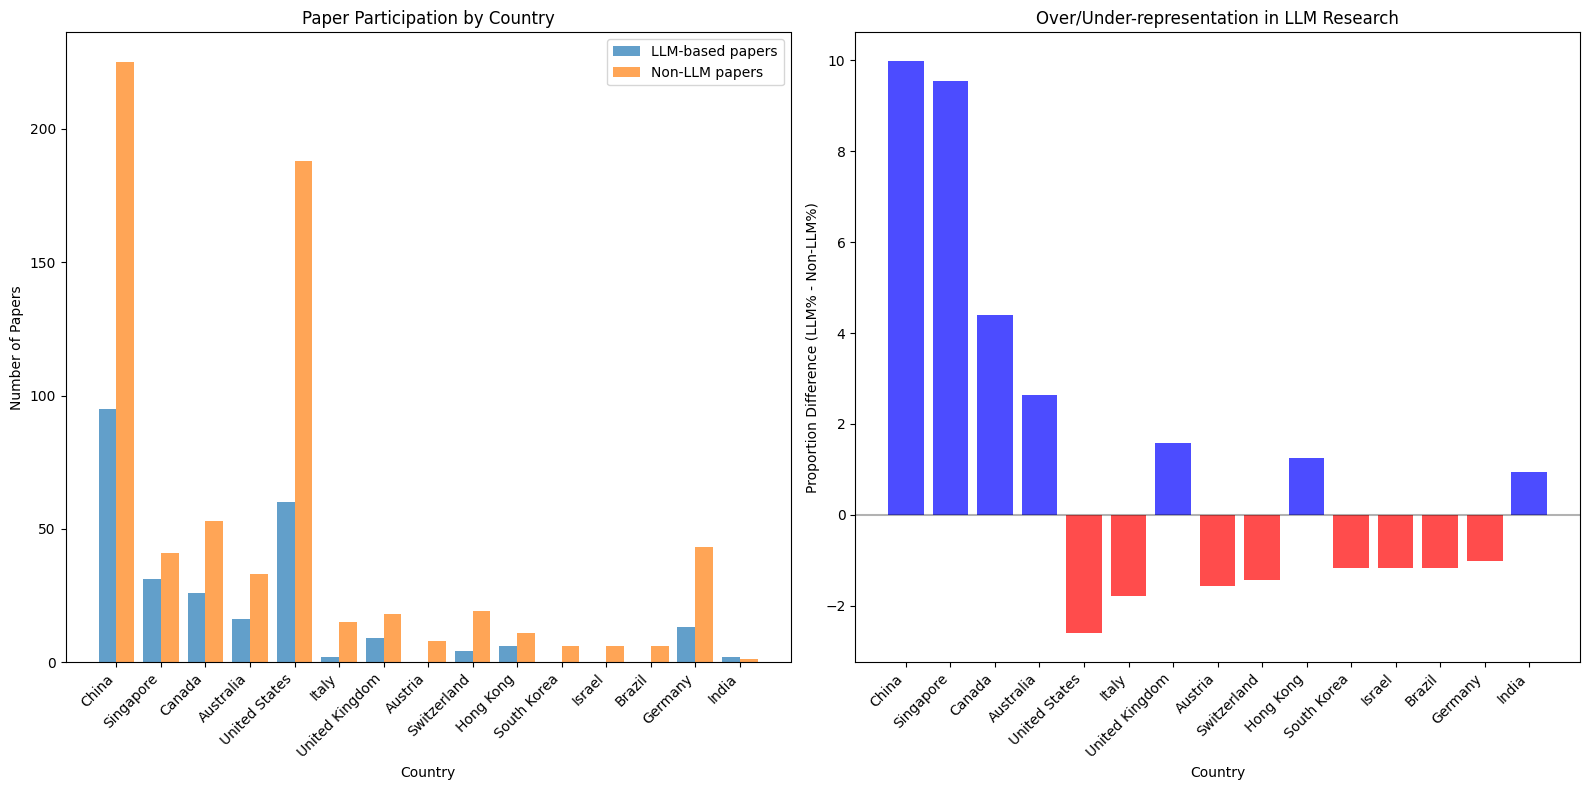

In [61]:
import matplotlib.pyplot as plt

# Create visualization comparing top countries
def visualize_country_comparison(top_n=10):
    top_countries = paper_comparison_sorted.head(top_n)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot 1: Absolute paper counts
    countries = top_countries.index
    x_pos = range(len(countries))
    
    ax1.bar([x - 0.2 for x in x_pos], top_countries['relevant_papers'], 
            width=0.4, label='LLM-based papers', alpha=0.7)
    ax1.bar([x + 0.2 for x in x_pos], top_countries['non_relevant_papers'], 
            width=0.4, label='Non-LLM papers', alpha=0.7)
    
    ax1.set_xlabel('Country')
    ax1.set_ylabel('Number of Papers')
    ax1.set_title('Paper Participation by Country')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(countries, rotation=45, ha='right')
    ax1.legend()
    
    # Plot 2: Proportional difference
    colors = ['red' if x < 0 else 'blue' for x in top_countries['prop_difference']]
    ax2.bar(x_pos, top_countries['prop_difference'], color=colors, alpha=0.7)
    ax2.set_xlabel('Country')
    ax2.set_ylabel('Proportion Difference (LLM% - Non-LLM%)')
    ax2.set_title('Over/Under-representation in LLM Research')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(countries, rotation=45, ha='right')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

visualize_country_comparison(top_n=15)